In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split


In [5]:
import os

dataset_dir = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray"

for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        # Print the complete path to each file in the dataset
        print(os.path.join(dirname, filename))

C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\.DS_Store
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\.DS_Store
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0003-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0005-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0006-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0007-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0009-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0010-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\test\NORMAL\IM-0011-000

C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\.DS_Store
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1003_virus_1685.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1004_bacteria_2935.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1004_virus_1686.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\chest_xray\train\PNEUMONIA\person1005_bacteria_2936.jpeg
C:\Users\

C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1000_bacteria_2931.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1000_virus_1681.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1001_bacteria_2932.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1002_bacteria_2933.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1003_bacteria_2934.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1003_virus_1685.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1004_bacteria_2935.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1004_virus_1686.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1005_bacteria_2936.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1005_virus_1688.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\train\PNEUMONIA\person1006_bacteria_2937.jpeg
C:\Users\Hp

C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._.DS_Store
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1000_bacteria_2931.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1000_virus_1681.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1001_bacteria_2932.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1002_bacteria_2933.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1003_bacteria_2934.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1003_virus_1685.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1004_bacteria_2935.jpeg
C:\Users\Hp\Downloads\archive (6)\chest_xray\__MACOSX\chest_xray\train\PNEUMONIA\._person1004_virus_1686.jpeg
C:\Users\Hp\

In [6]:
import pandas as pd
def create_dataframe(folder_path, label, result):
    filenames = os.listdir(folder_path)
    full_paths = [os.path.join(folder_path, filename) for filename in filenames if not filename.startswith('.DS_Store')]
    dataframe = pd.DataFrame({
        "Filename": full_paths,
        "Label": label,
        "Chest X-Ray": result
    })
    return dataframe

# creating dataframe for training and testing data
folder_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray"

train_normal_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\train\\NORMAL"
df_train = create_dataframe(train_normal_path, 'train', 'Normal')

train_pneumonia_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\train\\PNEUMONIA"
df_train = pd.concat([df_train, create_dataframe(train_pneumonia_path, 'train', 'Pneumonia')])
df_train

,Filename,Label,Chest X-Ray
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal
...,...,...,...
3870,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Pneumonia
3871,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Pneumonia
3872,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Pneumonia
3873,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Pneumonia


In [7]:
test_normal_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\test\\NORMAL"
df_test = create_dataframe(test_normal_path, 'test', 'Normal')

test_pneumonia_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\test\\PNEUMONIA"
df_test = pd.concat([df_test, create_dataframe(test_pneumonia_path, 'test', 'Pneumonia')])
df_test

,Filename,Label,Chest X-Ray
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Normal
...,...,...,...
385,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia
386,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia
387,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia
388,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,test,Pneumonia


In [8]:
val_normal_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\val\\NORMAL"
df_val = create_dataframe(val_normal_path, 'val', 'Normal')

val_pneumonia_path = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\val\\PNEUMONIA"
df_val = pd.concat([df_val, create_dataframe(val_pneumonia_path, 'val', 'Pneumonia')])
df_val

,Filename,Label,Chest X-Ray
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
7,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia


In [9]:
train_normal_img = df_train[df_train['Label'] == 'train'][df_train['Chest X-Ray'] == 'Normal']['Filename']

In [10]:
import matplotlib.pyplot as plt
import cv2

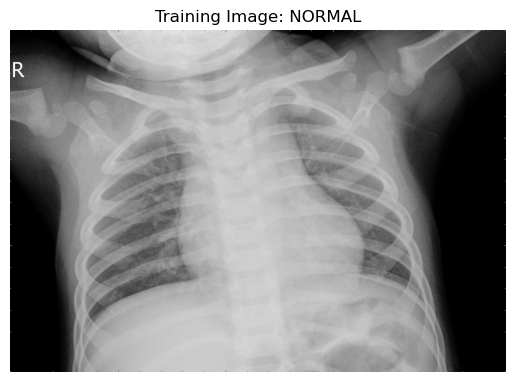

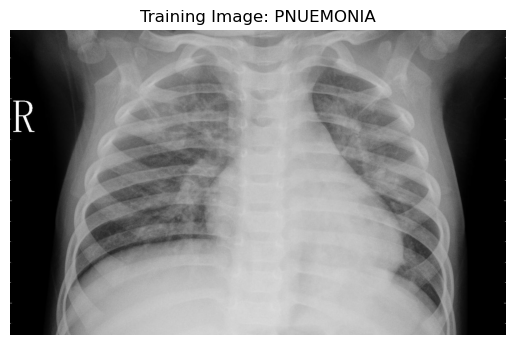

In [11]:
import os

first_normal_image_filename = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\train\\NORMAL\\NORMAL2-IM-1400-0001.jpeg"
first_pneumonia_image_filename = "C:\\Users\\Hp\\Downloads\\archive (6)\\chest_xray\\chest_xray\\train\\PNEUMONIA\\person1009_virus_1694.jpeg"
if os.path.exists(first_normal_image_filename):
    img_normal = cv2.imread(first_normal_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: NORMAL')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')
if os.path.exists(first_pneumonia_image_filename):
    img_normal = cv2.imread(first_pneumonia_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: PNUEMONIA')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')    
    

In [12]:
from sklearn.model_selection import train_test_split

df = pd.concat([df_train, df_test, df_val])
df['result'] = (df['Chest X-Ray'] == 'Pneumonia')
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,False
...,...,...,...,...
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,True


In [13]:
df['result'].replace(True, 1, inplace=True)
df['result'].replace(False, 0, inplace=True)
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,train,Normal,0
...,...,...,...,...
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1


In [14]:
l1, l2, l3 = len(df_train), len(df_train)+len(df_test), len(df_train)+len(df_test)+len(df_val)
train, test, val = df.iloc[:l1, :], df.iloc[l1:l2, :], df.iloc[l2:,:]
val

,Filename,Label,Chest X-Ray,result
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
2,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
3,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
4,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
5,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
6,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
7,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Normal,0
0,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1
1,C:\Users\Hp\Downloads\archive (6)\chest_xray\c...,val,Pneumonia,1


In [15]:
IMG_WIDTH = int(np.sqrt(80))
IMG_HEIGHT = int(np.sqrt(80))

In [16]:
import numpy as np
from PIL import Image
data_xx = df_train['Filename'].iloc[:].to_numpy()
images = []
for i in range(len(df_train)):
    image = cv2.cvtColor(cv2.imread(data_xx[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = (cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)))/255.
    images.append(img)

In [17]:
import numpy as np
images = np.asarray(images)
print(images.shape)

(5216, 8, 8)


In [18]:
data_yy = df['result'].iloc[:l1]
result = np.array(data_yy)

In [45]:
print(result.shape)

(5216,)


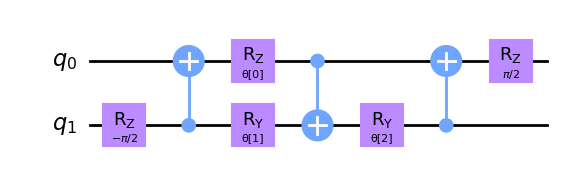

In [19]:
# Define a two qubit unitary 
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target


#Draw the circuit
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

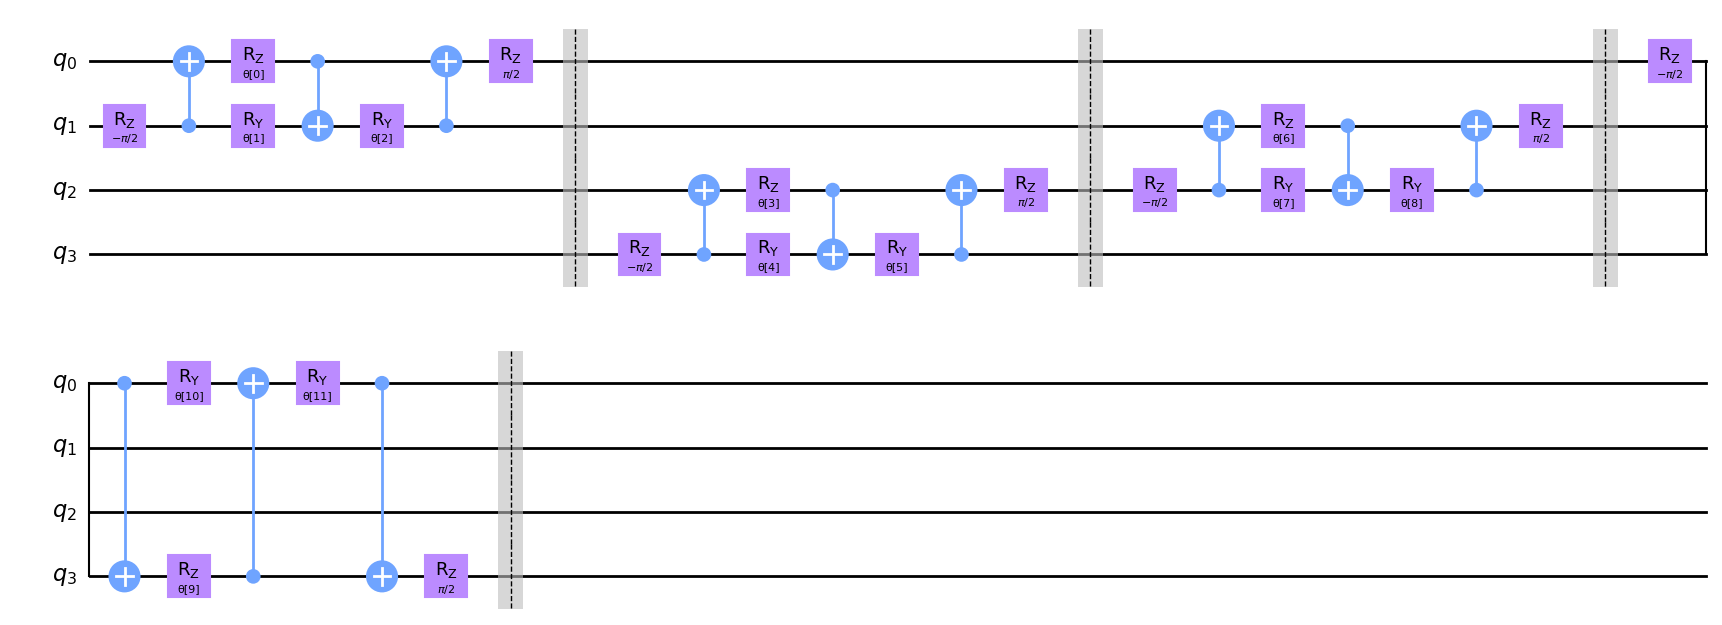

In [20]:
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc


circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

In [44]:
from qiskit import QuantumCircuit

def conv_layer_size(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)

    # Calculate the size of the convolutional layer
    conv_layer_size = len(qc.decompose())
    return conv_layer_size

circuit_size = conv_layer_size(4, "θ")
print("Size of the convolutional layer:", circuit_size)


Size of the convolutional layer: 36


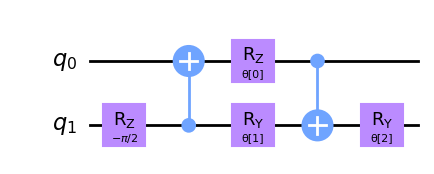

In [21]:
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target


params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

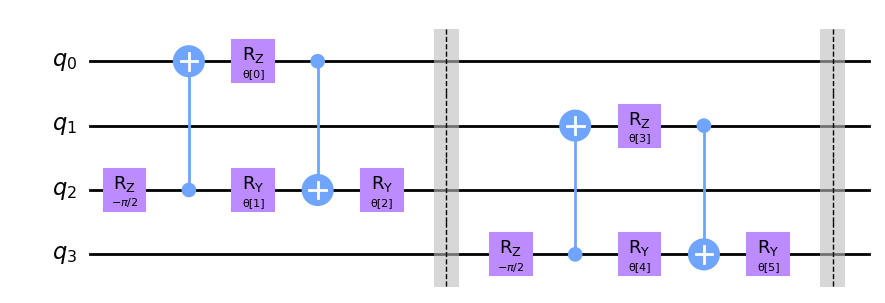

In [22]:
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc


sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

In [43]:
from qiskit import QuantumCircuit

def pool_layer_size(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    # Calculate the size of the pool layer
    pool_layer_size = len(qc)
    return pool_layer_size

sources = [0, 1]
sinks = [2, 3]
param_prefix = "θ"
size = pool_layer_size(sources, sinks, param_prefix)
print("Size of the pool layer:", size)

Size of the pool layer: 14


In [23]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.15)

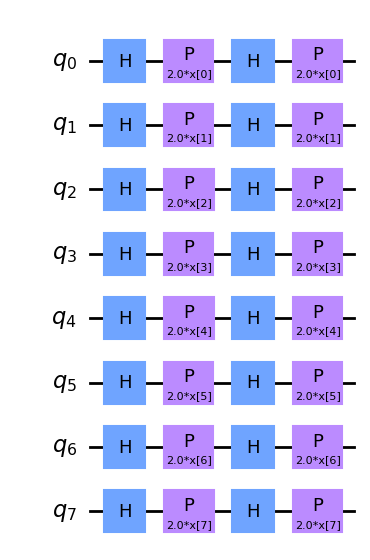

In [24]:
feature_map = ZFeatureMap(8)
feature_map.decompose().draw("mpl")

In [36]:
feature_map = ZFeatureMap(8)

ansatz = QuantumCircuit(8, name="Ansatz")

# First Convolutional Layer
ansatz.compose(conv_layer(8, "с1"), list(range(8)), inplace=True)

# First Pooling Layer
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

# Second Convolutional Layer
ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

# Second Pooling Layer
ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

# Third Convolutional Layer
ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

# Third Pooling Layer
ansatz.compose(pool_layer([0], [1], "p3"), list(range(6, 8)), inplace=True)

# Combining the feature map and ansatz
circuit = QuantumCircuit(8)
circuit.compose(feature_map, range(8), inplace=True)
circuit.compose(ansatz, range(8), inplace=True)

observable = SparsePauliOp.from_list([("Z" + "I" * 7, 1)])

# we decompose the circuit for the QNN to avoid additional data copying
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)

In [39]:
print(ansatz.parameters)

ParameterView([ParameterVectorElement(c2[0]), ParameterVectorElement(c2[1]), ParameterVectorElement(c2[2]), ParameterVectorElement(c2[3]), ParameterVectorElement(c2[4]), ParameterVectorElement(c2[5]), ParameterVectorElement(c2[6]), ParameterVectorElement(c2[7]), ParameterVectorElement(c2[8]), ParameterVectorElement(c2[9]), ParameterVectorElement(c2[10]), ParameterVectorElement(c2[11]), ParameterVectorElement(c3[0]), ParameterVectorElement(c3[1]), ParameterVectorElement(c3[2]), ParameterVectorElement(c3[3]), ParameterVectorElement(c3[4]), ParameterVectorElement(c3[5]), ParameterVectorElement(p1[0]), ParameterVectorElement(p1[1]), ParameterVectorElement(p1[2]), ParameterVectorElement(p1[3]), ParameterVectorElement(p1[4]), ParameterVectorElement(p1[5]), ParameterVectorElement(p1[6]), ParameterVectorElement(p1[7]), ParameterVectorElement(p1[8]), ParameterVectorElement(p1[9]), ParameterVectorElement(p1[10]), ParameterVectorElement(p1[11]), ParameterVectorElement(p2[0]), ParameterVectorEleme

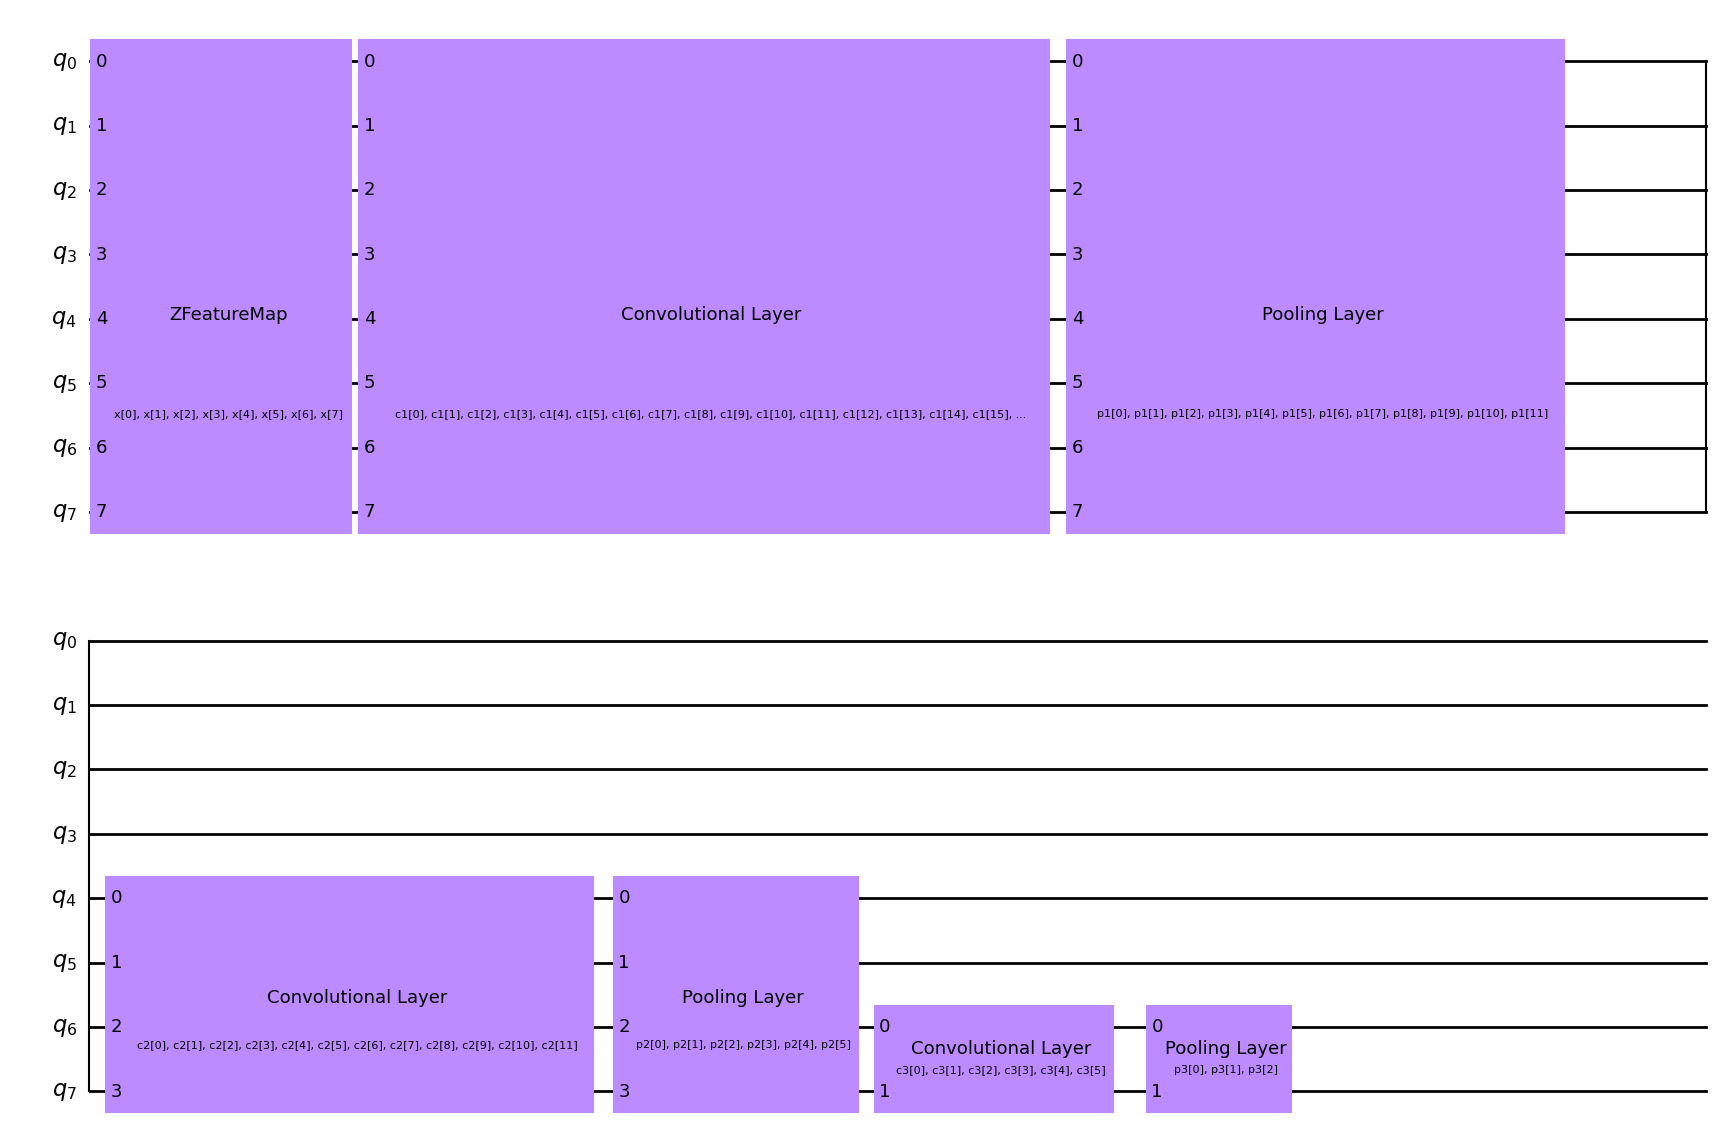

In [26]:
circuit.draw("mpl")

In [29]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [30]:
import numpy as np
initial_point = {
    'feature_map_0': np.random.rand(),
    'ansatz_0': np.random.rand(),
    'ansatz_1': np.random.rand(),
}
initial_point_array = np.array(list(initial_point.values()))
classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations
    callback=callback_graph,
    initial_point=initial_point,
)

In [31]:
x = np.array(images_train)
y = np.array(result_train)

In [32]:
print(x.shape)

(4433, 8, 8)


In [40]:
from qiskit.algorithms.optimizers import L_BFGS_B

# Define the optimizer
optimizer = L_BFGS_B(maxfun=200)

# Assuming 'initial_point' is a dictionary containing initial values for the parameters
# Convert the dictionary to a one-dimensional NumPy array
initial_point_array = np.array(list(initial_point.values()))

classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=optimizer,
    callback=callback_graph,
    initial_point=initial_point_array,
)

# Fit the classifier
classifier.fit(x, y)


ValueError: cannot reshape array of size 3 into shape (63,)

In [2]:
import numpy as np
import tensorflow as tf
import qiskit as qk
from qiskit.visualization import circuit_drawer
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

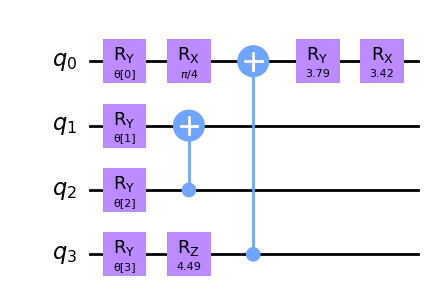

In [12]:
# Define the quantum convolutional layer circuit
def create_quantum_convolution_circuit(params):
    qc = QuantumCircuit(4)
    qc.ry(params[0], 0)
    qc.ry(params[1], 1)
    qc.ry(params[2], 2)
    qc.ry(params[3], 3)
    qc.rx(np.pi / 4, 0)
    qc.cx(2, 1)
    qc.rz(4.49, 3)
    qc.cx(3, 0)
    qc.ry(3.79, 0)
    qc.rx(3.42, 0)
    return qc
params = ParameterVector("θ", length=4)
circuit = create_quantum_convolution_circuit(params)
circuit.draw("mpl")

In [13]:
def quantum_convolution_layer(params):
    return tf.numpy_function(func=create_quantum_convolution_circuit, inp=[params], Tout=tf.float32)

In [16]:
# Define the QCNN model
def create_qcnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(8, 8)),
        
        # Quantum Convolutional Layer
        tf.keras.layers.Lambda(lambda x: np.array([create_quantum_convolution_circuit(params)])),
        
        # Classical Convolutional Layer
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        
        # Max Pooling Layer
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        
        # Flatten Layer
        tf.keras.layers.Flatten(),
        
        # Dense Layer
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Dropout Layer
        tf.keras.layers.Dropout(0.0),
        
        # Output Layer
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    return model

In [17]:
# Create the QCNN model
qnn_model = create_qcnn_model()

TypeError: Exception encountered when calling layer "lambda_2" (type Lambda).

ParameterExpression with unbound parameters ({ParameterVectorElement(θ[0])}) cannot be cast to a float.

Call arguments received by layer "lambda_2" (type Lambda):
  • inputs=tf.Tensor(shape=(None, 8, 8), dtype=float32)
  • mask=None
  • training=None